In [84]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [85]:
df = pd.read_csv("./weight.csv")
df.head()

,weight,obese
0,45.59,0
1,43.76,0
2,47.85,0
3,65.91,0
4,46.93,0


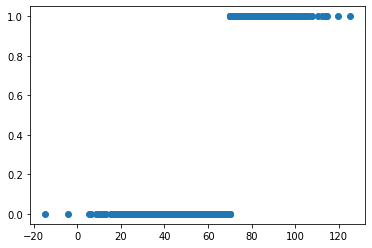

In [86]:
plt.scatter(df["weight"], df["obese"])

In [87]:
df = (df - df.min())/(df.max() - df.min())

In [88]:
## splitting data
train = df.sample(frac=0.7, random_state=1)
test = df.drop(train.index)

In [89]:
X = train["weight"].values.reshape(len(train), 1)
Y = train["obese"].values.reshape(len(train), 1)

In [90]:
def sigmoid(X):
    return 1/(1 + np.exp(-X))

In [226]:
def grad_dscnt(X, Y, W, B, lr, iters):
    
    cost = []
    
    for i in range(iters):
        
        H = X.dot(W) + B
        H = sigmoid(H)
        
        n = len(Y)
        
        cross_entropy = -(Y.T.dot(np.log(H)).item() + (1 - Y).T.dot(np.log(1 - H))).item()/(2 * len(H))
        cost.append(cross_entropy)
        
        W = W + lr*(1/n)*(X).T.dot(Y - H)
        B = B + lr*(1/n)*np.sum(Y - H, axis = 0)
        
    return cost

In [227]:
W = np.random.rand(X.shape[-1], 1)
B = np.random.rand()

In [228]:
cost = grad_dscnt(X, Y, W, -B, 0.001, 20000)

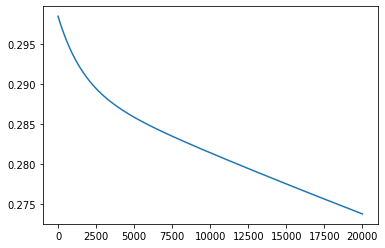

In [229]:
plt.plot(cost)

In [230]:
H = sigmoid(X.dot(W) - B)

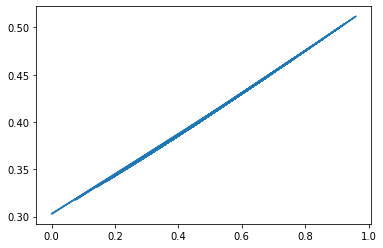

In [231]:
plt.plot(X, H)

In [232]:
pred = H > 0.5
pred = pred.astype(int)

In [233]:
true = 0
false = 0

for i, j in zip(pred, Y):
    if i == j:
        true = true + 1
    else:
        false = false + 1

In [234]:
100 * true/(true + false)

70.14285714285714